## Mall Customers Clustering Analysis

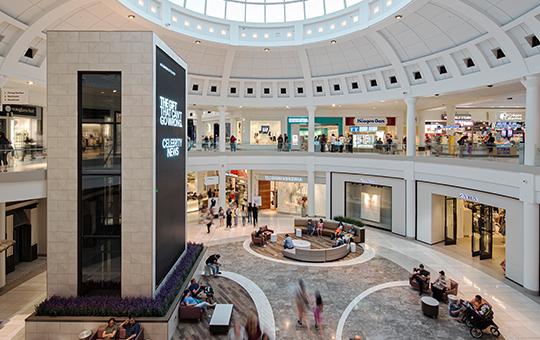

Objective: Perform market basket analysis to identify who are the target customers to start marketing strategy

Approach: K-Means Clustering

Importing modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
%matplotlib inline 

Data Exploration

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.set_index('CustomerID')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


Distributions of Age, Annual Income, and Spending Score

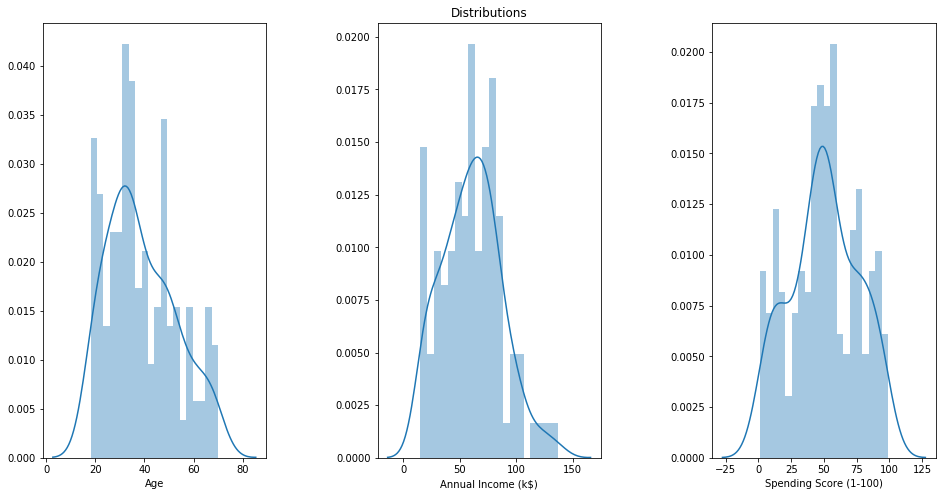

In [7]:
plt.figure(1 , figsize = (16 , 8))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distributions' if n == 2 else '')
plt.show()

Comments:
- Age distribution: The most regular customers for the Mall has age around 30-35 years of age, while the senior citizens are the least frequent visitor in the Mall. Youngsters are lesser in number as compared to the Middle aged people.

- Annual income distribution: There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. 

- Spending Score: The most regular customers have spending score around 40 to 60. Few people have spending score more than 80 or below 20. 

Boxplots of Gender vs Age, Annual Income and Spending Score

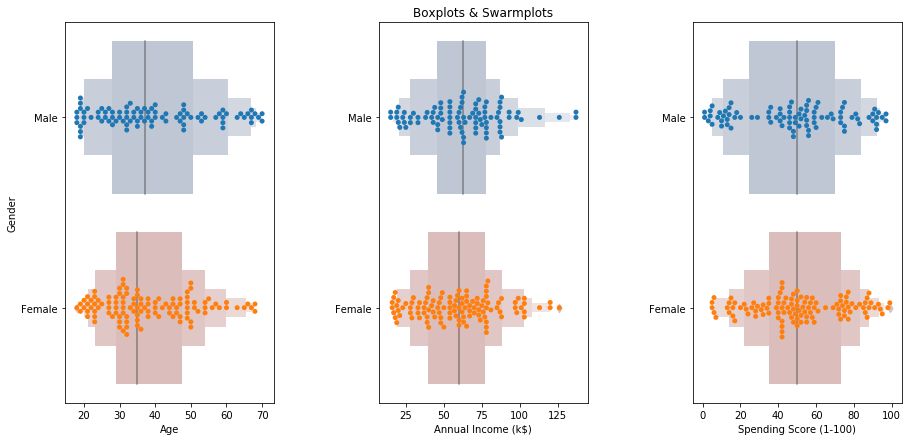

In [9]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxenplot(x=cols, y='Gender', data=df, palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

Comments: The plots of Gender vs Spending Score show that most of the males have a Spending Score of around 25k to 70k US Dollars whereas the females have a Spending Score of around 35k to 75k US Dollars, which indicates that the females shop and spend more.

Relations between Age , Annual Income and Spending Score

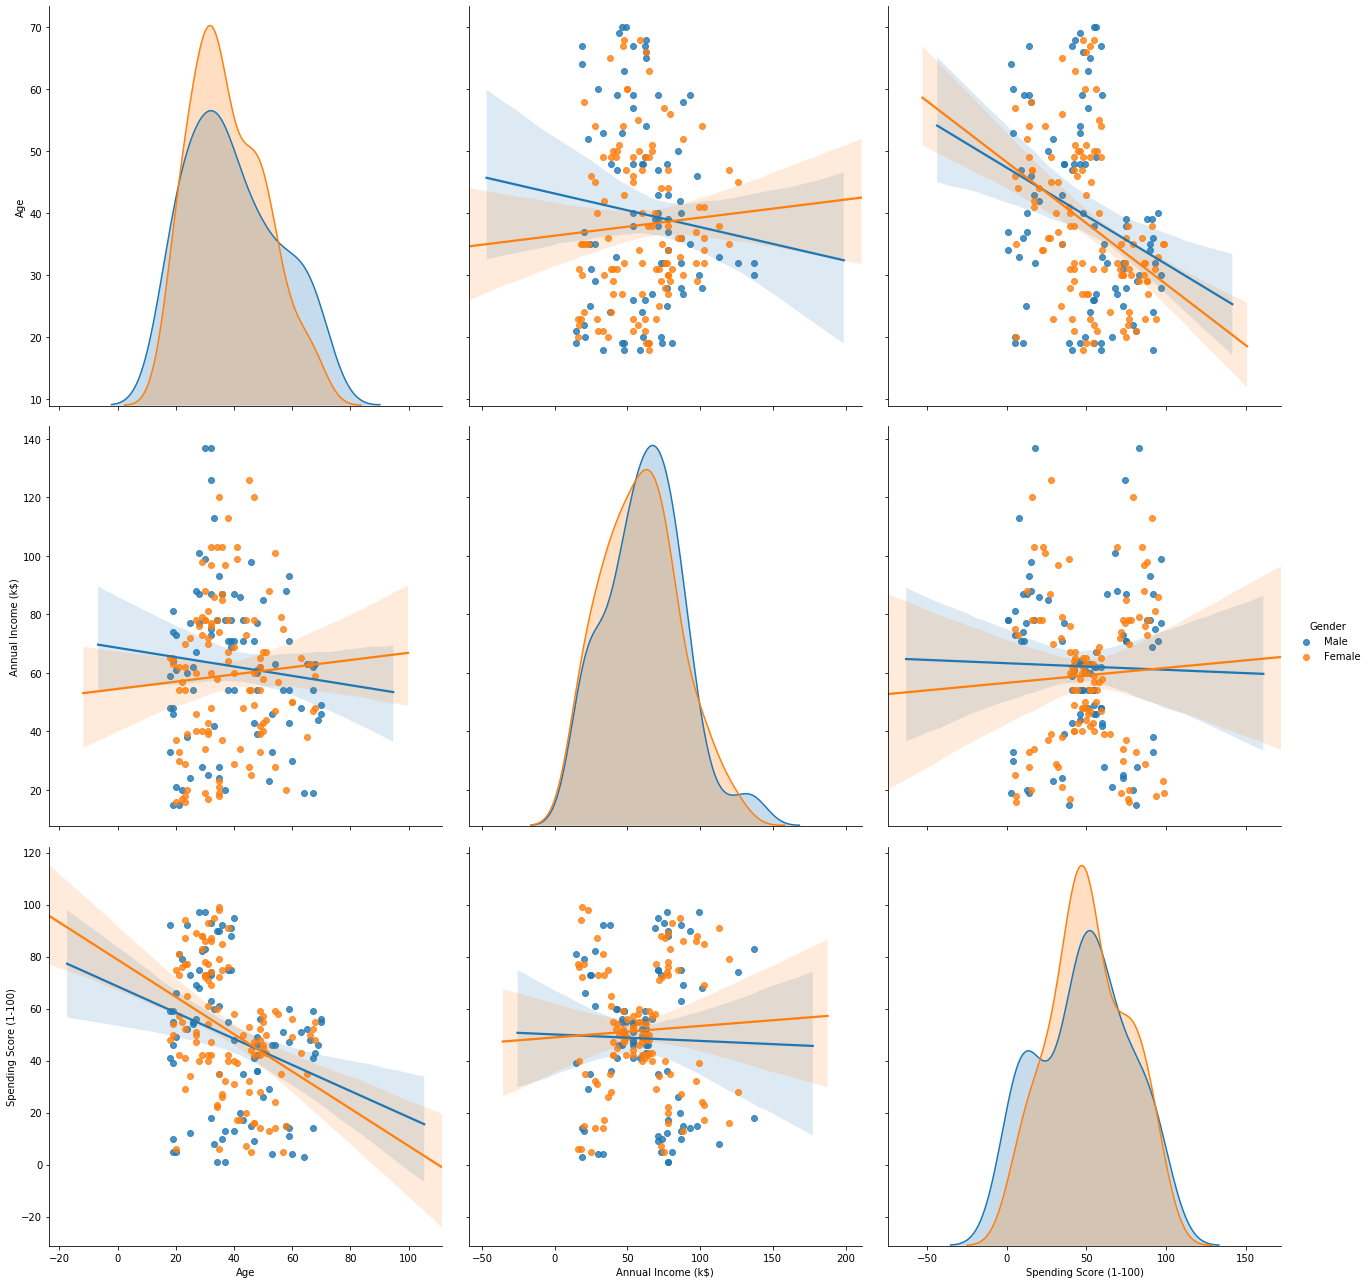

In [10]:
g = sns.pairplot(df, hue="Gender", 
                 vars=['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)'], 
                 kind='reg', size=6)

K-means clustering

- Based on Age and Spending Score

In [11]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

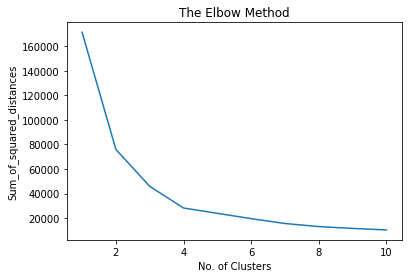

In [12]:
# The Elbow Method
from sklearn.cluster import KMeans
ss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X1)
    ss.append(km.inertia_)
    
plt.plot(range(1, 11), ss)
plt.title('The Elbow Method', fontsize = 12)
plt.xlabel('No. of Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.show()

In [13]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X1)

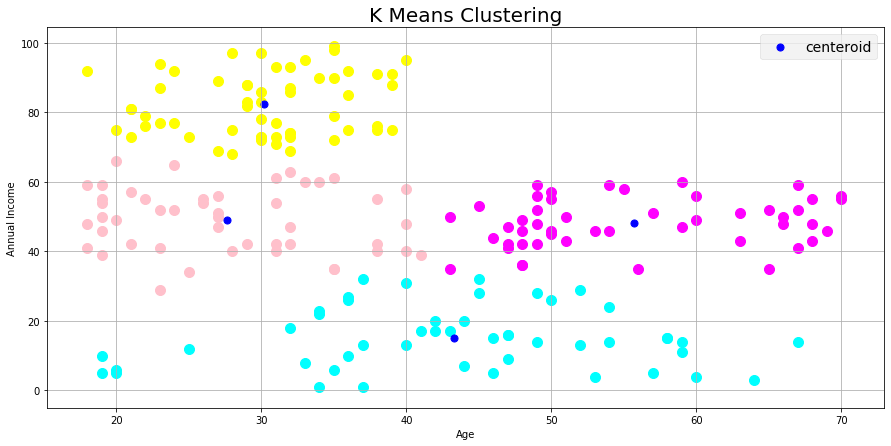

In [14]:
plt.figure(1 , figsize = (15 , 7))
plt.scatter(X1[y_means == 0, 0], X1[y_means == 0, 1], s = 100, c = 'pink')
plt.scatter(X1[y_means == 1, 0], X1[y_means == 1, 1], s = 100, c = 'yellow')
plt.scatter(X1[y_means == 2, 0], X1[y_means == 2, 1], s = 100, c = 'cyan')
plt.scatter(X1[y_means == 3, 0], X1[y_means == 3, 1], s = 100, c = 'magenta')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.grid()
plt.show()

- Based on Annual Income and Spending Score

In [15]:
X21 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

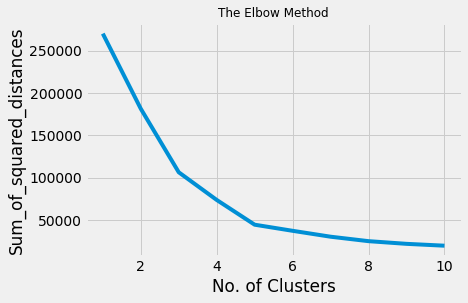

In [16]:
# The Elbow Method
from sklearn.cluster import KMeans
ss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X21)
    ss.append(km.inertia_)
    
plt.plot(range(1, 11), ss)
plt.title('The Elbow Method', fontsize = 12)
plt.xlabel('No. of Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.show()

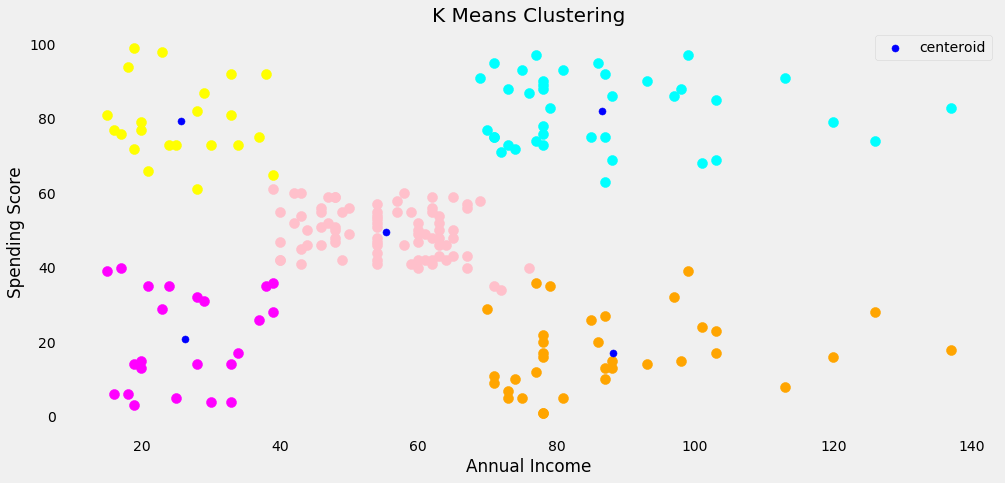

In [18]:
plt.figure(1 , figsize = (15 , 7))
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X21)

plt.scatter(X21[y_means == 0, 0], X21[y_means == 0, 1], s = 100, c = 'pink')
plt.scatter(X21[y_means == 1, 0], X21[y_means == 1, 1], s = 100, c = 'yellow')
plt.scatter(X21[y_means == 2, 0], X21[y_means == 2, 1], s = 100, c = 'cyan')
plt.scatter(X21[y_means == 3, 0], X21[y_means == 3, 1], s = 100, c = 'magenta')
plt.scatter(X21[y_means == 4, 0], X21[y_means == 4, 1], s = 100, c = 'orange')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

- Based on Age and Spending Score

In [19]:
X22 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

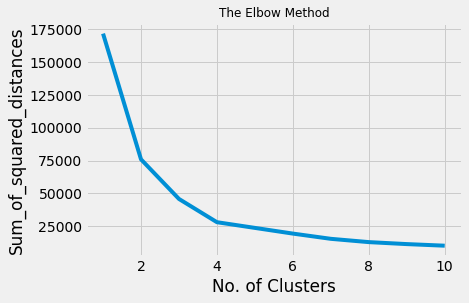

In [20]:
# The Elbow Method
from sklearn.cluster import KMeans
ss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X22)
    ss.append(km.inertia_)
    
plt.plot(range(1, 11), ss)
plt.title('The Elbow Method', fontsize = 12)
plt.xlabel('No. of Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.show()

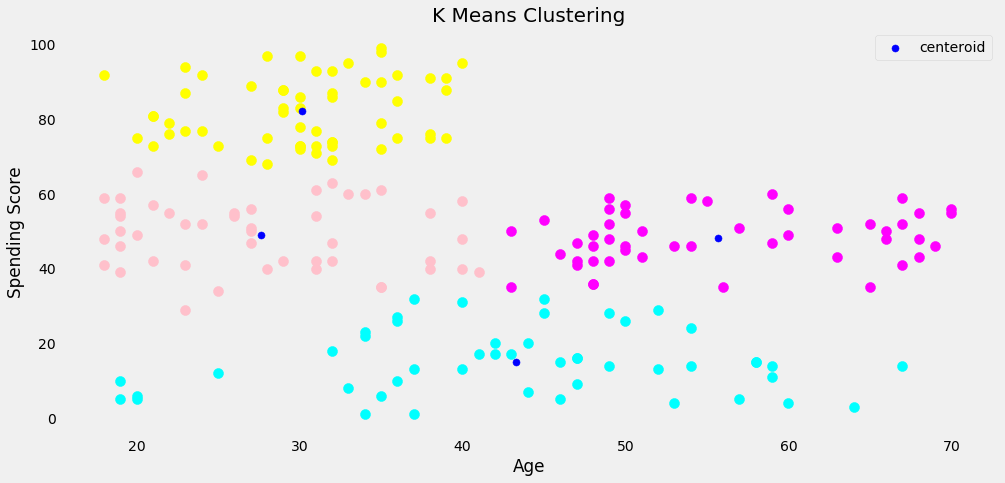

In [23]:
plt.figure(1 , figsize = (15 , 7))
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X22)

plt.scatter(X22[y_means == 0, 0], X22[y_means == 0, 1], s = 100, c = 'pink')
plt.scatter(X22[y_means == 1, 0], X22[y_means == 1, 1], s = 100, c = 'yellow')
plt.scatter(X22[y_means == 2, 0], X22[y_means == 2, 1], s = 100, c = 'cyan')
plt.scatter(X22[y_means == 3, 0], X22[y_means == 3, 1], s = 100, c = 'magenta')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

- Based on Age, Annual Income, and Spending Score

In [21]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values

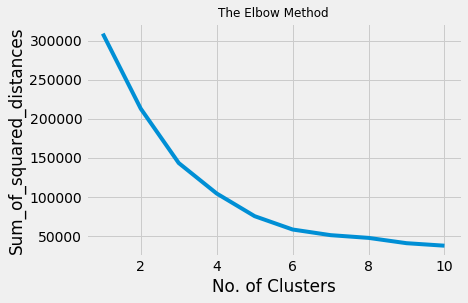

In [22]:
# The Elbow Method
from sklearn.cluster import KMeans
ss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X3)
    ss.append(km.inertia_)
    
plt.plot(range(1, 11), ss)
plt.title('The Elbow Method', fontsize = 12)
plt.xlabel('No. of Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.show()

In [24]:
km = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(X3)
labels = km.labels_
centroids = km.cluster_centers_

In [25]:
df['labels'] =  labels
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['labels'], 
        size= 5,
        line=dict(
            color= df['labels'],
            width= 10
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

The Clustering Analysis provides a very clear insight about the different segments of the customers in the Mall. 5 segments of Customers could be grouped based on their "Annual Income" and "Spending Score" which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.